In [1]:
import os
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import glob as glob
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.
C:\Users\u0125384\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\u0125384\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\u0125384\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\u0125384\Anaconda3\lib\site-packages\tensorflow\python\framewo

In [3]:
class my_Callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('acc')>0.999:
            print('\n Reached 99.9 % of accuracy so canceling training')
            self.model.stop_training = True
    
callbacks = my_Callback()

In [5]:
import os

happy_img = glob.glob('train/happy/*.png')
sad_img = glob.glob('train/sad/*.png')
#print(len(happy_dir_list), len(sad_dir_list))

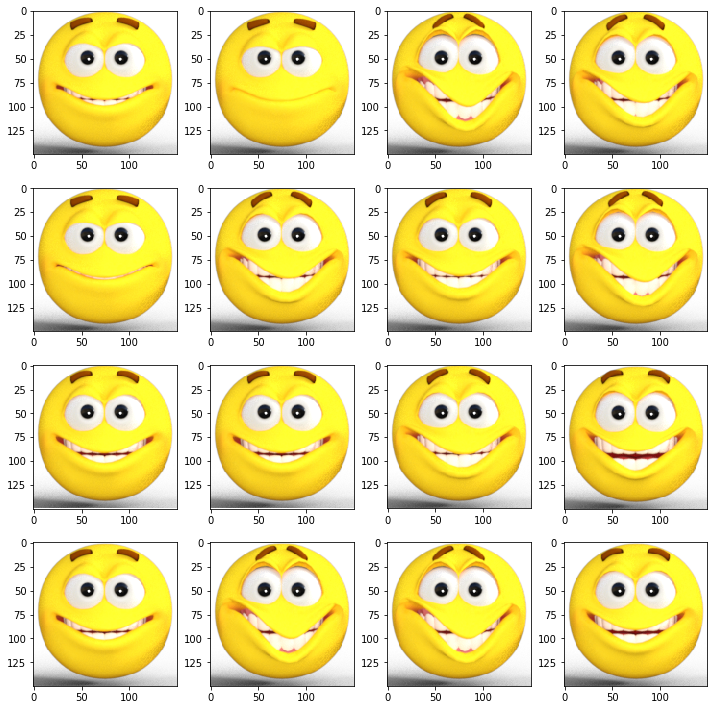

In [6]:
from random import randint
plt.figure(figsize = (10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(mpimg.imread(happy_img[randint(0, len(happy_img) - 1)]))
plt.tight_layout()

In [7]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3, 3), input_shape=(150, 150, 3), 
                                                           activation = 'relu'),
                                    tf.keras.layers.MaxPool2D((2,2)),
                                    
                                    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D((2,2)),
                                    
                                    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D((2, 2)),
                                    
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    tf.keras.layers.Dense(1, activation = 'sigmoid')
    
])
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 32)        0         
____

In [8]:
from keras.optimizers import RMSprop
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
size = 150
batch_size = 10
batch_size_valid = 8
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=30,
        horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    directory=r"./train/",
    target_size=(size, size),
    #color_mode="rgb",
    batch_size=batch_size,
    class_mode="binary",
    shuffle=True,
    seed=42
)

valid_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
    rotation_range=30,
        horizontal_flip=True)

valid_generator = valid_datagen.flow_from_directory(
    directory=r"./valid/",
    target_size=(size, size),
    #color_mode="rgb",
    batch_size=batch_size_valid,
    class_mode="binary",
    shuffle=True,
    seed=42
)

test_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
    rotation_range=30,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
    directory=r"./test/",
    target_size=(size, size),
    #color_mode="rgb",
    batch_size=1,
    class_mode=None,
    shuffle=False,
    seed=42
)

Found 68 images belonging to 2 classes.
Found 8 images belonging to 2 classes.
Found 4 images belonging to 1 classes.


In [10]:
#STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
#STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
#model.fit_generator(generator=train_generator,
#                    steps_per_epoch=STEP_SIZE_TRAIN,
#                    validation_data=valid_generator,
#                    validation_steps=STEP_SIZE_VALID,
#                    epochs=10, verbose=1, callbacks=[callbacks]
#)
model.fit_generator(train_generator, steps_per_epoch=20, validation_data=valid_generator, 
                    epochs = 30, verbose=1, callbacks=[callbacks])

Epoch 1/30
20/20 [==============================] - 4s 219ms/step - loss: 1.0575 - acc: 0.5773 - val_loss: 0.6082 - val_acc: 0.7500
Epoch 2/30
20/20 [==============================] - 3s 166ms/step - loss: 0.3980 - acc: 0.8814 - val_loss: 0.6004 - val_acc: 0.7500
Epoch 3/30
20/20 [==============================] - 3s 163ms/step - loss: 0.4591 - acc: 0.7938 - val_loss: 0.3548 - val_acc: 0.7500
Epoch 4/30
20/20 [==============================] - 3s 165ms/step - loss: 0.1835 - acc: 0.9235 - val_loss: 0.4049 - val_acc: 0.8750
Epoch 5/30
20/20 [==============================] - 3s 164ms/step - loss: 0.1637 - acc: 0.9381 - val_loss: 0.3612 - val_acc: 0.8750
Epoch 6/30
20/20 [==============================] - 3s 162ms/step - loss: 0.1891 - acc: 0.9227 - val_loss: 0.1775 - val_acc: 1.0000
Epoch 7/30
20/20 [==============================] - 3s 160ms/step - loss: 0.1499 - acc: 0.9536 - val_loss: 0.2986 - val_acc: 0.8750
Epoch 8/30
20/20 [==============================] - 3s 163ms/step - loss: 0.

In [11]:
model.evaluate_generator(generator=valid_generator,
steps=batch_size_valid)

[0.028700129536446184, 1.0]

In [12]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

4/4 [==============================] - 0s 25ms/step


In [13]:
predicted_class_indices=np.argmax(pred,axis=1)
predicted_class_indices

array([0, 0, 0, 0], dtype=int64)

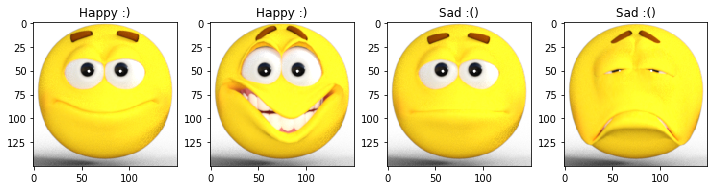

In [18]:
from keras.preprocessing import image
import glob

test_imgs = glob.glob('test/test_folder/*.png')

plt.figure(figsize = (10, 10))
for img, i in zip(test_imgs, range(len(test_imgs))):
    plt.subplot(4, 4, i + 1)

    
    plt.imshow(mpimg.imread(img))

    test_img = image.load_img(img, target_size = (150, 150))
    test_img_array = image.img_to_array(test_img)
    test_img_arr_expand = np.expand_dims(test_img_array, axis = 0)
    test_img_arr_expand_vstack = np.vstack([test_img_arr_expand])
    classes = model.predict(test_img_arr_expand_vstack, batch_size=2)

    if classes[0][0] == 1.0:
        plt.title('Sad :()')
    else:
        plt.title('Happy :)')
        
plt.tight_layout()